In [109]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url, sep=';')

df.head(20)
#df.info()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [110]:
#convert to datetime

df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce') 

df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce') 
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce') 



In [111]:
df["Delay_Avgang_Fra"] = df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"] #Avvik  avgang
df["Delay_Ankomst_Fra"] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"] #Avvik  ankomst

In [112]:
df["Delay_Avgang_Fra"] = df["Delay_Avgang_Fra"].dt.total_seconds() #delay in seconds
df["Delay_Ankomst_Fra"] = df["Delay_Ankomst_Fra"].dt.total_seconds() #delay in seconds


In [113]:
df["Passasjerer_Ombord"] = df["Passasjerer_Ombord"].clip(lower=0) #Negativ verdi -> 0

In [114]:
#Bytter kjøretøy_kapasitet og Passasjerer_ombord med "Kapasitet"
df.loc[(df.Kjøretøy_Kapasitet - df.Passasjerer_Ombord > 50) , 'Kapasitet'] = 'God plass ombord'
df.loc[(df.Kjøretøy_Kapasitet - df.Passasjerer_Ombord < 50) , 'Kapasitet'] = 'Lite plass ombord'

<AxesSubplot:xlabel='Kjøretøy_Kapasitet'>

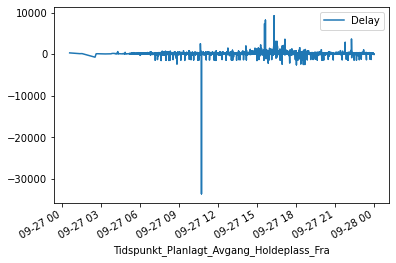

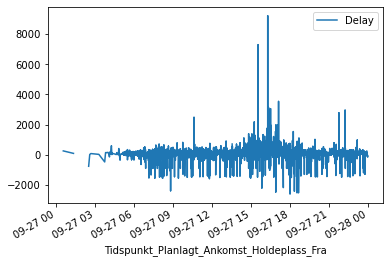

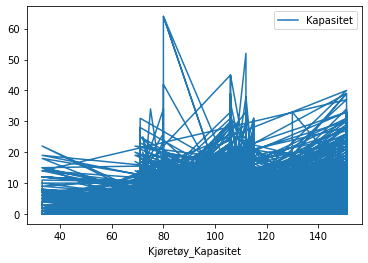

In [115]:
df.plot(x='Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', y='Delay_Avgang_Fra', label='Delay') 
df.plot(x='Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', y='Delay_Ankomst_Fra', label='Delay') 
df.plot(x='Kjøretøy_Kapasitet', y='Passasjerer_Ombord', label='Kapasitet') 



In [116]:
#Sletter kolonner som er erstattet med nye    
df = df.drop(["Kjøretøy_Kapasitet", "Passasjerer_Ombord","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"], axis=1) 

In [117]:
df.dropna() #Dropper NAN og NAT

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Delay_Avgang_Fra,Delay_Ankomst_Fra,Kapasitet
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,59.0,53.0,God plass ombord
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,26.0,20.0,God plass ombord
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,21.0,-4.0,God plass ombord
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,86.0,64.0,God plass ombord
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,113.0,73.0,God plass ombord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,828.0,798.0,God plass ombord
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,100.0,92.0,God plass ombord
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,670.0,643.0,God plass ombord
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,83.0,71.0,God plass ombord
